In [17]:
import sympy as sym
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()


# Geometrical constants, pressure drop and prescribed velocity

In the first step, the geometrical and kinematical parameters are set. They are numerical expressions. In order to separate expressions from symbols, for symbolic computing, expressions have an underline, i.e. R1_ is an expression and R1 is a symbol.

In [18]:
# Geometrical constants, prescribed pressure drop and prescribed velocity
relativeEccentrcity = 0.5
R2_ = 7.6
R1_ = 5
shift = (R2_-R1_)*relativeEccentrcity
u_R_ = -0.4
dp_ = 10*10**-5
l_ = 1.55
mu_ = 10.11


In [19]:
R1, R2, gamma, xi, eta, x, y = sym.symbols('R1 R2 gamma xi eta x y', real=True)
b, A, B, C = sym.symbols('b, A B C', real=True)
epsilon, kappa, alpha, beta = sym.symbols('epsilon kappa alpha beta', real=True)
c, M, F, Psi, u_R, mu, l, dp = sym.symbols('c M F Psi u_R mu l dp', real=True)
k, m, n = sym.symbols('k m n', integer=True)


# The velocity

In what follows the fluid velocity of [PHW33] is implemented. The velocity of [PHW33] is due to a pressure drop $dp$ 

$$\frac{M^{2} dp \left(A \eta + B + \Psi - \frac{- \cos{\left(\xi \right)} + \cosh{\left(\eta \right)}}{4 \cos{\left(\xi \right)} + 4 \cosh{\left(\eta \right)}}\right)}{l \mu}$$

and the velocity due to the motion of the inner boundary, proposed in [LG21] is given by

$$\frac{u_{R} \left(- \alpha + \eta\right)}{- \alpha + \beta}$$

The overall eccentric annular flow velocity then is the superposition of both.

In [20]:
u = (dp/(mu*l))*M**2*(Psi+A*eta+B-(sym.cosh(eta)-sym.cos(xi))/(4*(sym.cosh(eta)+sym.cos(xi))))
u = u + (u_R/(beta-alpha))*(eta-alpha)
u


M**2*dp*(A*eta + B + Psi - (-cos(xi) + cosh(eta))/(4*cos(xi) + 4*cosh(eta)))/(l*mu) + u_R*(-alpha + eta)/(-alpha + beta)

In [21]:
A_ = (sym.coth(alpha)-sym.coth(beta))/(2*(alpha-beta))
A_


(coth(alpha) - coth(beta))/(2*alpha - 2*beta)

In [22]:
B_ = (beta*(1-2*sym.coth(alpha))-alpha*(1-2*sym.coth(beta)))/(4*(alpha-beta))
B_


(-alpha*(1 - 2*coth(beta)) + beta*(1 - 2*coth(alpha)))/(4*alpha - 4*beta)

In [23]:
F_ = (R2**2-R1**2+b**2)/(2*b)
F_


(-R1**2 + R2**2 + b**2)/(2*b)

In [24]:
M_ = sym.sqrt(F**2-R2**2)
M_


sqrt(F**2 - R2**2)

In [25]:
alpha_ = 0.5*sym.ln((F+M)/(F-M))
alpha_


0.5*log((F + M)/(F - M))

In [26]:
beta_ = 0.5*sym.ln((F-b+M)/(F-b-M))
beta_



0.5*log((F + M - b)/(F - M - b))

In [27]:
summand = sym.exp(-n*beta)*sym.coth(beta)*sym.sinh(n*(eta-alpha))
summand = summand - sym.exp(-n*alpha)*sym.coth(alpha)*sym.sinh(n*(eta-beta))
summand = (sym.cos(n*xi)/(sym.sinh(n*(beta-alpha))))*summand
Psi_ = sym.Sum((-1)**n*summand, (n, 1, m))
Psi_


Sum((-1)**n*(exp(-beta*n)*sinh(n*(-alpha + eta))*coth(beta) - exp(-alpha*n)*sinh(n*(-beta + eta))*coth(alpha))*cos(n*xi)/sinh(n*(-alpha + beta)), (n, 1, m))

# Velocity in w-plane rectangle in $\xi$ and $\eta$

The eccentric annulus is transformed to a rectangle by the transform $$w(z)=2\arctan\left(\frac{z+i\cdot \gamma}{c}\right)$$

It is a slightly adapted version of the mapping from [PHW33]. The new mapping from [LG21] includes a shift in the imaginary axis described by $\gamma$. This shift is added in order be able to apply the mapping $w$ directly to the original eccentric annulus.

In [28]:
gamma_ = (M_*sym.coth(alpha_.subs(M, M_))).subs(F, F_)
gamma_ = float(gamma_.subs(R2, R2_).subs(R1, R1_).subs(b, abs(shift)))


## The actual conformal mapping itself

Separating imaginary and real parts yields the new cartesian coordinates in the w-plane. In this plane, the eccentric annulus is described by a rectangle.

In [29]:
eta_ = (M**2 - 2*M*(y+gamma) + x**2 + (y+gamma)**2)
eta_ = (M**2 + 2*M*(y+gamma) + x**2 + (y+gamma)**2)/eta_
eta_ = sym.ln(eta_)/2
eta_


log((M**2 + 2*M*(gamma + y) + x**2 + (gamma + y)**2)/(M**2 - 2*M*(gamma + y) + x**2 + (gamma + y)**2))/2

In [30]:
xi_ = -sym.atan2(2*M*x, (M**2 - x**2 - (y+gamma)**2))
xi_


-atan2(2*M*x, M**2 - x**2 - (gamma + y)**2)

/tmp/ipykernel_66/807935889.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(Xi, Eta, uwNum(Xi, Eta), cmap='rainbow')


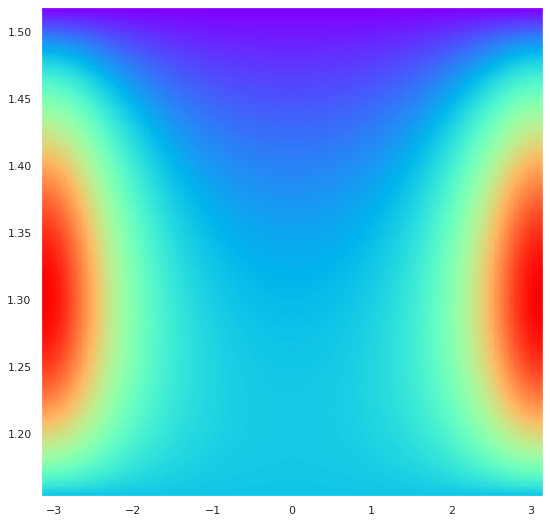

In [31]:
alphaNum = alpha_.subs(M, M_).subs(F, F_).subs(R2, R2_).subs(R1, R1_)
alphaNum = float(alphaNum.subs(b, abs(shift)))

betaNum = beta_.subs(M, M_).subs(F, F_).subs(R2, R2_).subs(R1, R1_)
betaNum = float(betaNum.subs(b, abs(shift)))

cNum = M_.subs(F, F_).subs(R2, R2_).subs(R1, R1_)
cNum = float(cNum.subs(b, abs(shift)))

velW = u.subs(A, A_).subs(B, B_).subs(Psi, Psi_)
velW = velW.subs(alpha, alpha_).subs(beta, beta_)
velW = velW.subs(M, M_).subs(F, F_)
velW = velW.subs(R2, R2_).subs(R1, R1_).subs(b, abs(shift))
velW = velW.subs(gamma, gamma_).subs(u_R, u_R_).subs(mu, mu_)
velW = velW.subs(l, l_).subs(dp, 10**5*dp_)

uwNum = sym.lambdify((xi, eta), velW.subs(m, 100))

# Geometry creation and plotting
Xi = np.linspace(-np.pi, np.pi, 200)
Eta = np.linspace(alphaNum, betaNum, 200)
Xi, Eta = np.meshgrid(Xi, Eta)
fig, ax = plt.subplots(figsize=(9, 9))
plt.pcolor(Xi, Eta, uwNum(Xi, Eta), cmap='rainbow')


# Velocity in z-plane eccentric annulus in $x$ and $y$

Now, taking the velocity from the pervious cells and expressing $\xi$ and $\eta$ by $x$ and $y$, the velocity can be evaluated and plotted in the eccentric annulus!

/tmp/ipykernel_66/2682415016.py:21: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, uzNum(X, Y), cmap='rainbow')
/tmp/ipykernel_66/2682415016.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(X, Y, uzNum(X, Y), cmap='rainbow')


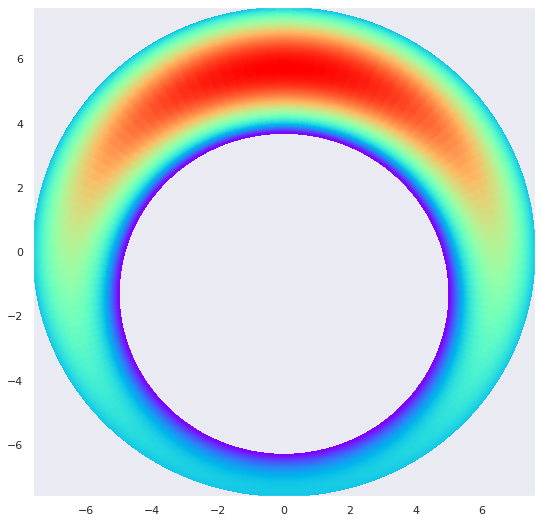

In [32]:
velZ = u.subs(A, A_).subs(B, B_).subs(Psi, Psi_)
velZ = velZ.subs(eta, eta_).subs(xi, xi_)
velZ = velZ.subs(alpha, alpha_).subs(beta, beta_)
velZ = velZ.subs(M, M_).subs(F, F_)
velZ = velZ.subs(R2, R2_).subs(R1, R1_).subs(b, abs(shift))
velZ = velZ.subs(gamma, gamma_).subs(u_R, u_R_).subs(mu, mu_)
velZ = velZ.subs(l, l_).subs(dp, 10**5*dp_)


uzNum = sym.lambdify((x, y), velZ.subs(m, 100))

# Geometry creation and plotting
X = np.linspace(-np.pi, np.pi, 200)
Y = np.linspace(alphaNum, betaNum, 200)
X, Y = np.meshgrid(X, Y)
zeta = X + 1j*Y
x_y = cNum*np.tan(zeta/2)
X = np.real(x_y)
Y = np.imag(x_y)-gamma_
fig, ax = plt.subplots(figsize=(9, 9))
plt.pcolor(X, Y, uzNum(X, Y), cmap='rainbow')


## Literature


[LG21] Lauer-Baré Z. and Gaertig E., *Conformal Mappings with SymPy: Towards Python-driven Analytical Modeling in Physics*, PROC. OF THE 20th PYTHON IN SCIENCE CONF. (SCIPY 2021)

[PHW33] [Piercy NAV, Hooper MS, Winny HF. LIII. Viscous flow through pipes with cores, The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 1933](https://www.tandfonline.com/doi/abs/10.1080/14786443309462212)

